<a href="https://colab.research.google.com/github/hshastri/PyTorchBasics/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# https://setosa.io/ev/image-kernels/ -> good for learning

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# convert MNIST image files into tensor of 4 dimensions (num of images, height, width, color channel)
transform = transforms.ToTensor()

In [28]:
# Train data
train_data = datasets.MNIST(root='/ccn_data', train=True, download=True, transform=transform)

In [29]:
# test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [30]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /ccn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [31]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [32]:
pwd

'/content'

In [33]:
ls

sample_data/


In [34]:
 cd ../

/


In [35]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [36]:
cd cnn_data

/cnn_data


In [37]:
ls

MNIST/


In [38]:
cd ../

/


In [39]:
ls

bin@                        etc/     mnt/                      sbin@
boot/                       home/    NGC-DL-CONTAINER-LICENSE  srv/
ccn_data/                   kaggle/  opt/                      sys/
cnn_data/                   lib@     proc/                     tmp/
content/                    lib32@   python-apt/               tools/
cuda-keyring_1.1-1_all.deb  lib64@   python-apt.tar.xz*        usr/
datalab/                    libx32@  root/                     var/
dev/                        media/   run/


In [40]:
cd content

/content


In [41]:
 # create a small batch size of images --- 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [47]:
# define our cnn model
# describe convolutional layer and what it's doing (2 convolutional layers)
conv1 = nn.Conv2d(1, 6, 3, 1)
"""
Input channels (1):
This layer expects input with 1 channel, which usually means grayscale images like MNIST.

Output channels (6):
The layer applies 6 different filters, producing 6 output feature maps. Each filter learns to detect a different feature (like horizontal edges, vertical lines, corners, etc.).

Kernel size (3):
Each of the 6 filters is a 3×3 window. This small patch slides across the input image, scanning for patterns.

Stride (1):
This means the filter moves 1 pixel at a time, so the scanning is fine-grained.
"""
conv2 = nn.Conv2d(6, 16, 3, 1)

In [45]:
# grab 1 MNIST record/image
for i, (X_Train, y_Train) in enumerate(train_data):
  break

In [49]:
X_Train # 1 image -> 28 rows, 28 cols

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

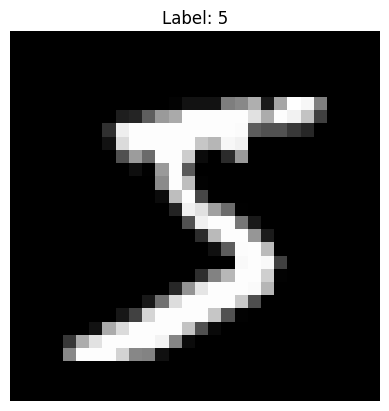

In [50]:
plt.imshow(X_Train.squeeze(), cmap='gray')
plt.title(f"Label: {y_Train}")
plt.axis('off')
plt.show()